# Imports

In [1]:
# %matplotlib widget

from utility_data import *
from utility_plots import *
import matplotlib.pyplot as plt

## Dataset Interaction

In [2]:
from torchaudio.transforms import MelSpectrogram, MFCC

# DEFINE TRANSFORM
sample_rate = 32000

mel = MelSpectrogram(sample_rate=sample_rate, n_mels=32)
mfcc = MFCC(sample_rate=sample_rate, n_mfcc=32)

/Users/tommasoferracina/tommaso/quercia/birdclef2025/.venv/lib/python3.13/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [3]:
from torch.utils.data import DataLoader

# INITIALIZE TRAIN_AUDIO DATASET & DATALOADER
ta_dataset = AudioDataset(metadata=True)
ta_dataloader = DataLoader(ta_dataset, batch_size=16, shuffle=True, num_workers=0)

# DEFINE TRAIN_AUDIO METADATA
ta_metadata = ta_dataset.data.iloc[:, -6:]

# INITIALIZE TRAIN_SOUNDSCAPES DATASET & DATALOADER
ts_dataset = AudioDataset(metadata_csv="", audio_dir="train_soundscapes", metadata=True)
ts_dataloader = DataLoader(ts_dataset, batch_size=16, shuffle=True, num_workers=0)

# DEFINE TRAIN_SOUNDSCAPES METADATA
ts_metadata = ts_dataset.data.iloc[:, 2:]

## Frequency of labels

In [4]:
data = ta_dataset.data

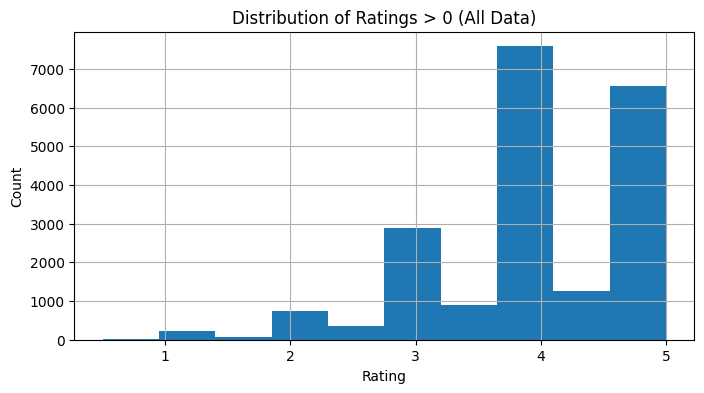

In [5]:
rated_audios = data[data['rating'] > 0]

plt.figure(figsize=(8, 4))
rated_audios['rating'].hist(bins=10)
plt.title("Distribution of Ratings > 0 (All Data)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [6]:
rating_thresh = 3.5
rated_labels = rated_audios['primary_label'].unique()
high_rated_labels = rated_audios[rated_audios['rating'] > rating_thresh]['primary_label'].unique()
lost_labels = set(rated_labels) - set(high_rated_labels)

print(f"Total labels: {len(rated_labels)}")
print(f"Labels lost if filtering (rating > {rating_thresh}): {len(lost_labels)}")
print("Lost labels:", lost_labels)


Total labels: 171
Labels lost if filtering (rating > 3.5): 2
Lost labels: {'41970', '126247'}


In [7]:
top_examples = []

for label in lost_labels:
    top = rated_audios[rated_audios['primary_label'] == label].sort_values(by='rating', ascending=False).head(5)
    top_examples.append(top)

top_lost_label_examples = pd.concat(top_examples)

In [8]:
mask = (data['rating'] > rating_thresh) | (data['rating'] == 0)
filtered_data = data[mask]
combined_data = pd.concat([filtered_data, top_lost_label_examples])

In [9]:
removed = len(data)-len(combined_data)
print(f"Removed {removed} audio clips, which counts for {removed/len(data)}% of the data")
print(f'We still have {len(combined_data['primary_label'].unique())} primary labels.')

Removed 5211 audio clips, which counts for 0.18243243243243243% of the data
We still have 206 primary labels.


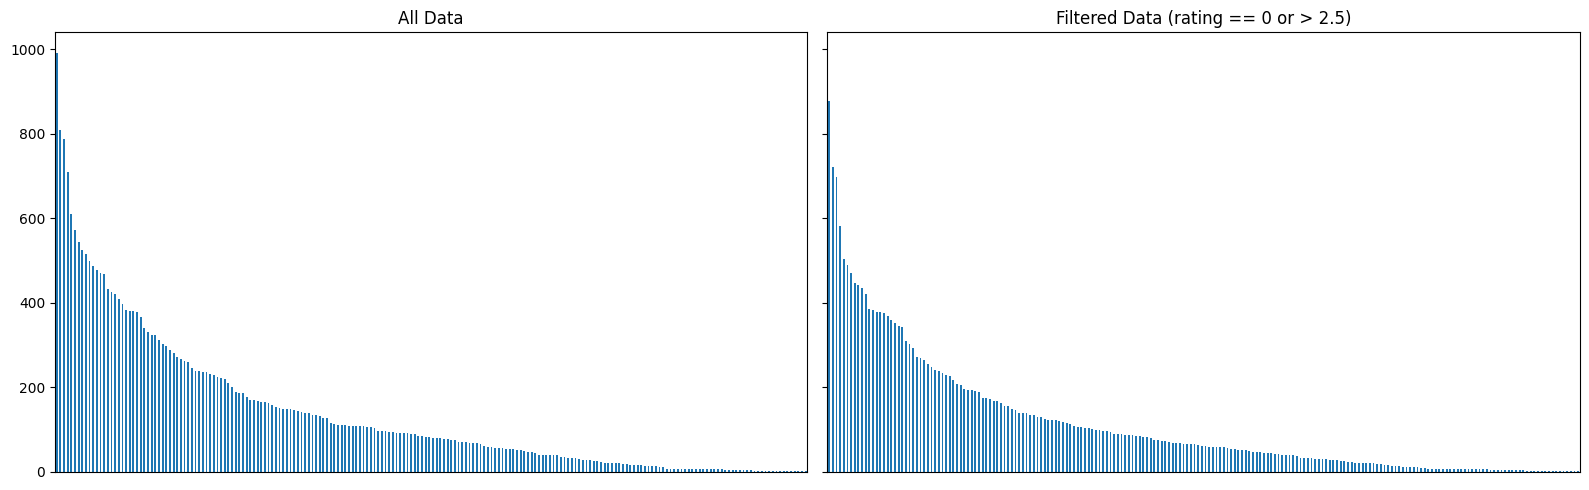

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True)

# Plot for full data
data["primary_label"].value_counts().sort_values(ascending=False).plot(
    kind='bar', ax=axes[0]
)
axes[0].get_xaxis().set_visible(False)
axes[0].set_title("All Data")

# Plot for clean_data
combined_data["primary_label"].value_counts().sort_values(ascending=False).plot(
    kind='bar', ax=axes[1]
)
axes[1].get_xaxis().set_visible(False)
axes[1].set_title("Filtered Data (rating == 0 or > 2.5)")

plt.tight_layout()
plt.show()


In [11]:
summary_clean, numeric_clean = summarize_secondary_labels(combined_data)
summary_data, numeric_data = summarize_secondary_labels(data)


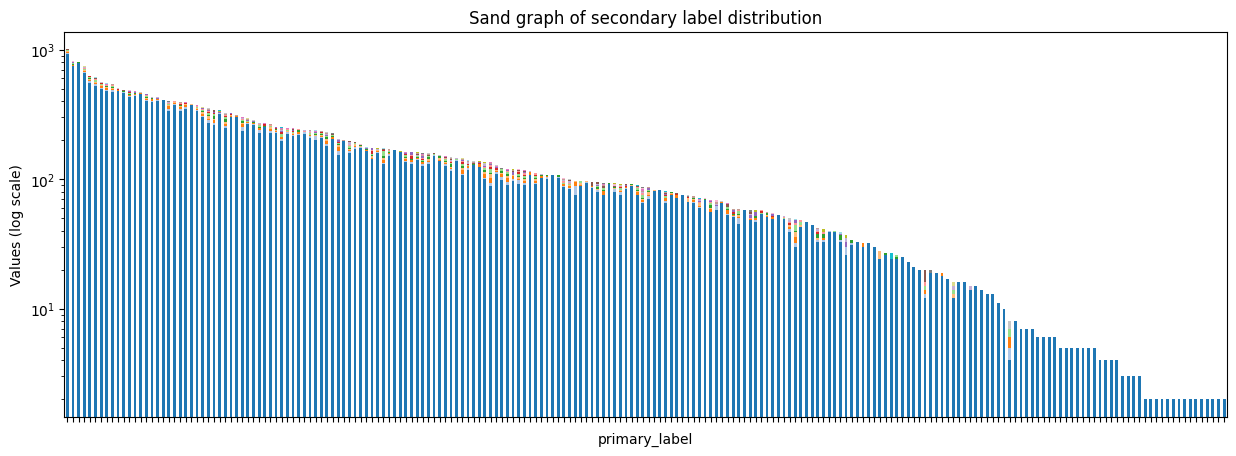

In [12]:
sand_plot(numeric_data, "Sand graph of secondary label distribution")

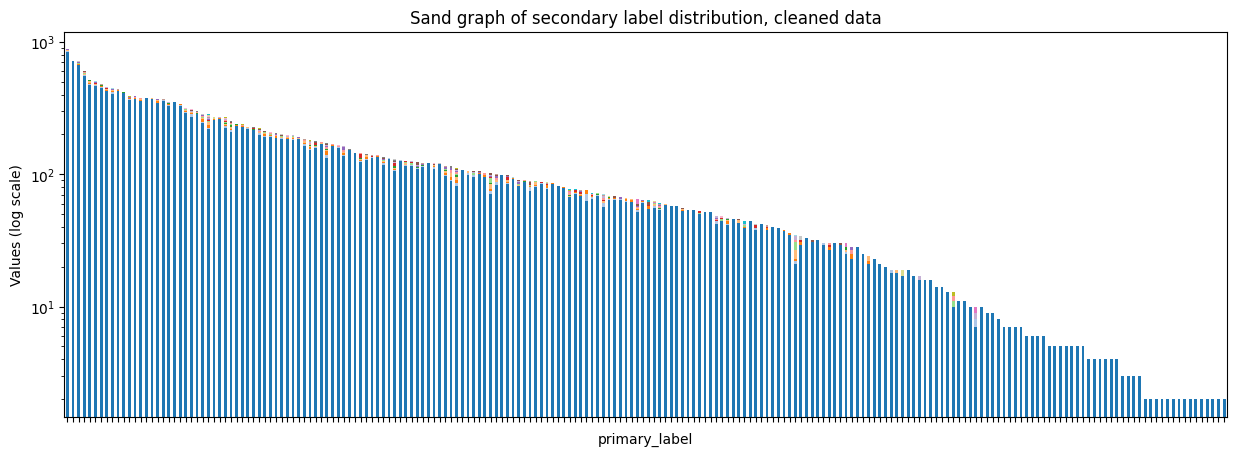

In [13]:
sand_plot(numeric_clean, "Sand graph of secondary label distribution, cleaned data")

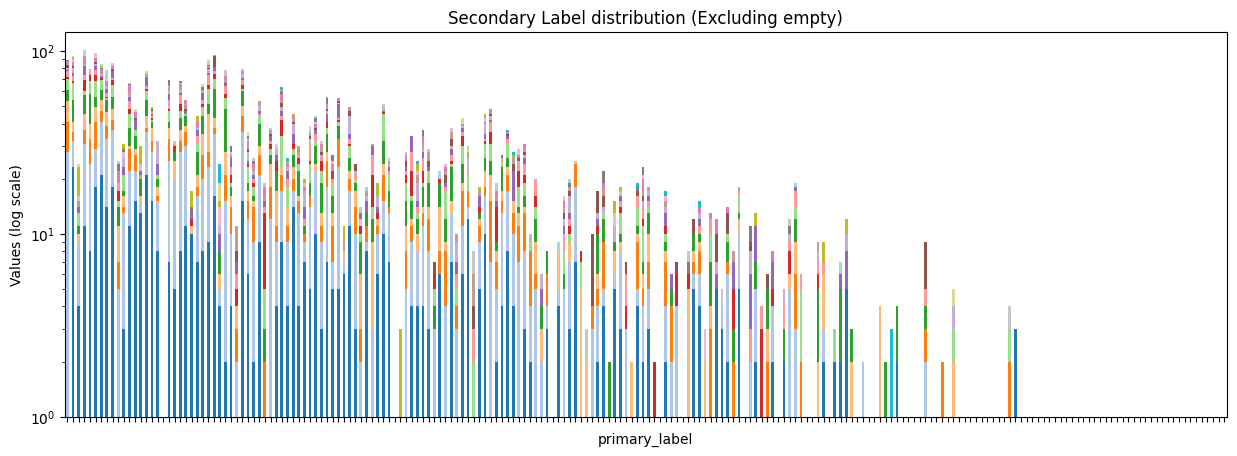

In [14]:
numeric_data_filtered = numeric_data.drop('empty', axis=1)
sand_plot(numeric_data_filtered, "Secondary Label distribution (Excluding empty)")

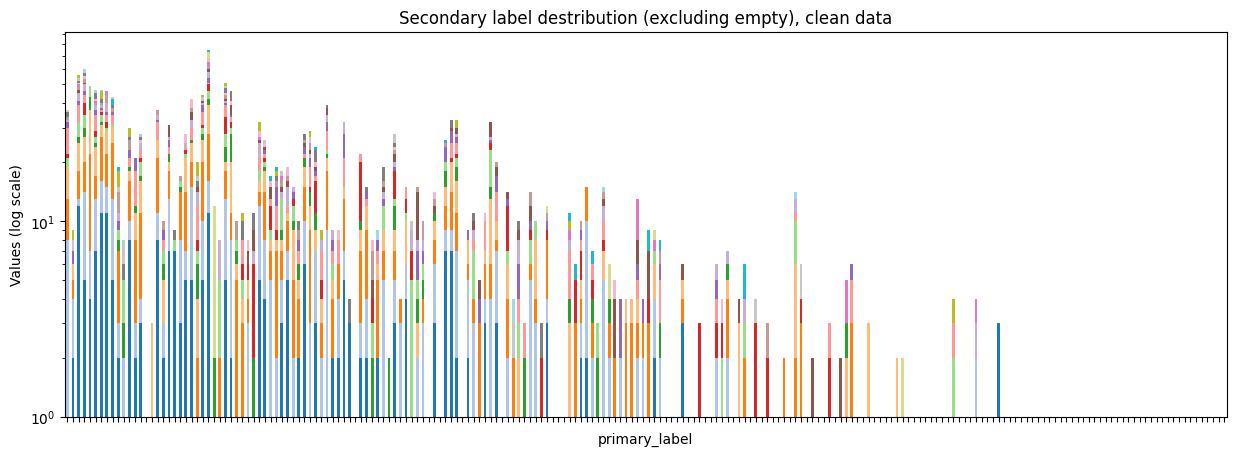

In [15]:
numeric_clean_filt = numeric_clean.drop('empty', axis=1)
sand_plot(numeric_clean_filt, "Secondary label destribution (excluding empty), clean data")